# Prediction of Annual Turnover of a restaurant

# Importing the libraries

In [1090]:
# Importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as ctb
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error

import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

pd.options.display.max_rows = None
pd.options.display.max_columns = 1000

import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [1091]:
df = pd.read_csv('Train_dataset.csv', index_col = 0)
df.head()

#index_col = 0 is used to make the first column as Index

,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
Registration Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


# Checking the presence of null values

In [1092]:
#checking the dtypes of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 60001 to 63493
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual Turnover                3493 non-null   int64  
 1   Cuisine                        3493 non-null   object 
 2   City                           3493 non-null   object 
 3   Restaurant Location            3493 non-null   object 
 4   Opening Day of Restaurant      3493 non-null   object 
 5   Facebook Popularity Quotient   3394 non-null   float64
 6   Endorsed By                    3493 non-null   object 
 7   Instagram Popularity Quotient  3437 non-null   float64
 8   Fire Audit                     3493 non-null   int64  
 9   Liquor License Obtained        3493 non-null   int64  
 10  Situated in a Multi Complex    3493 non-null   int64  
 11  Dedicated Parking              3493 non-null   int64  
 12  Open Sitting Available         3493 non-nul

In [1093]:
#checking the count of null values
df.isnull().sum()

Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs Rating               2483
Value Deals 

In [1094]:
#checking the shape of dataframe so that we can match it again after treating the missing values
df.shape

(3493, 33)

In [1095]:
#Converting the count of missing values to the percentage of missing values present in each Variable and thus sorting it in decending format
percent = df.isnull().sum()*100/len(df)
percent.sort_values(ascending = False)

Live Sports Rating               94.131119
Value Deals Rating               77.497853
Comedy Gigs Rating               71.085027
Live Music Rating                21.900945
Overall Restaurant Rating         6.069281
Facebook Popularity Quotient      2.834240
Instagram Popularity Quotient     1.603206
Resturant Tier                    1.402806
Ambience                          0.715717
Dedicated Parking                 0.000000
Situated in a Multi Complex       0.000000
Liquor License Obtained           0.000000
Fire Audit                        0.000000
Privacy                           0.000000
Endorsed By                       0.000000
Opening Day of Restaurant         0.000000
Open Sitting Available            0.000000
City                              0.000000
Cuisine                           0.000000
Restaurant Location               0.000000
Restaurant Zomato Rating          0.000000
Restaurant Type                   0.000000
Restaurant Theme                  0.000000
Comfortabli

## As we can see there are 3 variables with missing values percentage more than 50%. Thus treatment is not possible therefore, dropping 3 features i.e. Live Sports Rating, Value Deals Rating, Comedy Gigs Rating.

In [1096]:
df = df.drop(columns = ['Live Sports Rating', 'Value Deals Rating', 'Comedy Gigs Rating', 'City'])
df.head()

,Annual Turnover,Cuisine,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
Registration Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60001,42000000,"indian,irish",Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,8.0,8,6,6,6
60002,50000000,"indian,irish",Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,5.0,7,7,3,8
60003,32500000,"tibetan,italian",Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,7.0,10,5,2,8
60004,110000000,"turkish,nigerian",Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,7.0,7,4,3,5
60005,20000000,"irish,belgian",Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,NaN,6,2,4,6


In [1097]:
#checking whether the missing values are successfully dropped or not
percent = df.isnull().sum()*100/len(df)
percent.sort_values(ascending = False)

Live Music Rating                21.900945
Overall Restaurant Rating         6.069281
Facebook Popularity Quotient      2.834240
Instagram Popularity Quotient     1.603206
Resturant Tier                    1.402806
Ambience                          0.715717
Privacy                           0.000000
Cuisine                           0.000000
Restaurant Location               0.000000
Opening Day of Restaurant         0.000000
Endorsed By                       0.000000
Fire Audit                        0.000000
Liquor License Obtained           0.000000
Situated in a Multi Complex       0.000000
Dedicated Parking                 0.000000
Open Sitting Available            0.000000
Restaurant Theme                  0.000000
Restaurant Type                   0.000000
Comfortablility                   0.000000
Restaurant Zomato Rating          0.000000
Restaurant City Tier              0.000000
Order Wait Time                   0.000000
Staff Responsivness               0.000000
Value for M

### Now for the remaining 5 columns with the missing values we need to identify the stretegy to be used to treat the missing values i.e mean, median, mode.

In [1098]:
df['Live Music Rating'].median()

4.0

In [1099]:
df['Live Music Rating'].mode()

0    4.0
dtype: float64

In [1100]:
df['Overall Restaurant Rating'].median()

9.0

In [1101]:
df['Overall Restaurant Rating'].mode()

0    9.0
dtype: float64

In [1102]:
df['Facebook Popularity Quotient'].median()

79.0

In [1103]:
df['Facebook Popularity Quotient'].mean()

77.93871538008239

In [1104]:
df['Instagram Popularity Quotient'].median()

74.05

In [1105]:
df['Instagram Popularity Quotient'].mean()

74.40468431771886

In [1106]:
df['Resturant Tier'].median()

2.0

In [1107]:
df['Resturant Tier'].mean()

1.9265389082462254

In [1108]:
df['Ambience'].median()

7.0

In [1109]:
df['Ambience'].mean()

6.423010380622838

### After Analysing, the stretegy 'median' is the best way to treat the missing values 

# Taking care of missing values

In [1110]:
#Assigning all the column to a single variable
missing = ['Live Music Rating','Overall Restaurant Rating','Facebook Popularity Quotient','Instagram Popularity Quotient','Resturant Tier','Ambience']

In [1111]:
#Treating missing values with the help of SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df[missing])
df[missing] = imputer.transform(df[missing])

In [1112]:
#checking the treatment is successfull or not
df.isnull().sum()

Annual Turnover                  0
Cuisine                          0
Restaurant Location              0
Opening Day of Restaurant        0
Facebook Popularity Quotient     0
Endorsed By                      0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Resturant Tier                   0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsivness              0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Live Music Rating                0
Ambience                         0
Lively                           0
Service                          0
Comfortablility                  0
Privacy             

In [1113]:
#Checking the shape of data
df.shape

(3493, 29)

# Working with Categorical Data

### Treating the 'Opening Day of Restaurant' column

In [1114]:
#Checking the counts
df['Opening Day of Restaurant'].value_counts()

27-12-2009    10
10-07-2010     9
08-12-2010     8
15-10-2010     7
22-12-2009     7
10-07-2009     7
05-06-2010     7
29-04-2010     7
05-12-2009     7
12-09-2010     7
03-08-2009     6
08-01-2011     6
14-03-2011     6
23-02-2011     6
27-05-2009     6
07-10-2009     6
30-06-2010     6
27-06-2011     6
20-01-2010     6
28-03-2010     6
26-07-2010     6
30-06-2009     6
23-02-2010     6
06-10-2009     6
31-07-2009     6
15-09-2010     6
27-07-2009     6
12-05-2010     6
05-02-2009     6
29-05-2010     6
13-06-2011     5
04-06-2009     5
28-06-2010     5
02-01-2011     5
20-08-2009     5
07-09-2010     5
04-09-2009     5
26-06-2010     5
11-06-2009     5
20-01-2011     5
27-08-2010     5
07-11-2008     5
24-07-2009     5
21-07-2010     5
02-07-2011     5
10-02-2010     5
30-05-2010     5
19-09-2010     5
13-12-2011     5
25-08-2011     5
05-08-2009     5
29-04-2011     5
31-12-2010     5
01-07-2011     5
27-12-2010     5
20-03-2010     5
30-10-2009     5
17-04-2010     5
15-12-2009    

In [1115]:
#Calculating the age of restaurant
import pandas as pd
from datetime import datetime
from datetime import date


def calculate_age(Opening_day):
    Opening_day = datetime.strptime(Opening_day, "%d-%m-%Y").date()
    today = date.today()
    return today.year - Opening_day.year - ((today.month, today.day) < (Opening_day.month, Opening_day.day))

#Creating a new feature as 'Years_open'

df['Years_open'] = df['Opening Day of Restaurant'].apply(calculate_age)
print(df['Years_open'])

Registration Number
60001    12
60002    12
60003     9
60004    12
60005    11
60006     9
60007     9
60008     9
60009    10
60010     8
60011    12
60012    12
60013    11
60014    11
60015     9
60016    12
60017     9
60018    14
60019     9
60020    11
60021    13
60022    10
60023    10
60024    15
60025     8
60026    11
60027    14
60028     9
60029     8
60030     9
60031    12
60032     9
60033    10
60034    10
60035    12
60036    11
60037     9
60038     9
60039    10
60040    11
60041    13
60042    10
60043    10
60044     8
60045    13
60046     9
60047    10
60048    10
60049    11
60050    13
60051    14
60052    10
60053    10
60054    10
60055    10
60056    10
60057    12
60058    12
60059    12
60060    24
60061    10
60062     8
60063    11
60064    10
60065    15
60066    11
60067    12
60068    10
60069    13
60070     9
60071     9
60072    11
60073     9
60074     9
60075    10
60076     9
60077    11
60078    10
60079     9
60080    10
60081     9
60082   

In [1116]:
#checking unique values
df['Years_open'].unique()

array([12,  9, 11, 10,  8, 14, 13, 15, 24, 16,  7,  4, 18, 19, 17, 21, 20],
      dtype=int64)

In [1117]:
#checking the shape of data
df.shape

(3493, 30)

In [1118]:
#Dropping the 'Opening Day of Restaurant' column as it has no use
df = df.drop('Opening Day of Restaurant',axis='columns')

In [1119]:
#Checking the shape again
df.shape

(3493, 29)

### Finally we have treated the 'Opening Day of Restaurant' column

### Now Treating the 'Restaurant Theme' column

In [1120]:
#Grouping all the themes under 5% in 'other' section
z =df['Restaurant Theme'].value_counts()/len(df)*100
y = z[z.apply(lambda x:x<6)]
df['Restaurant Theme'] = df['Restaurant Theme'].apply(lambda x :'other' if x in y else x)
df['Restaurant Theme']

Registration Number
60001    Arabian
60002      Greek
60003       90's
60004    Arabian
60005      Greek
60006      Greek
60007    Arabian
60008      other
60009      Greek
60010      Greek
60011    Arabian
60012       90's
60013      other
60014      Greek
60015      other
60016       90's
60017      Greek
60018    Arabian
60019    Arabian
60020    Arabian
60021    Arabian
60022       90's
60023      Greek
60024      Greek
60025    Arabian
60026    Arabian
60027    Arabian
60028      Greek
60029      Greek
60030       90's
60031    Arabian
60032    Arabian
60033    Arabian
60034       90's
60035    Arabian
60036      Greek
60037    Arabian
60038      Greek
60039    Arabian
60040      Greek
60041      other
60042    Arabian
60043       90's
60044      Greek
60045    Arabian
60046      other
60047    Arabian
60048    Arabian
60049    Arabian
60050       90's
60051    Arabian
60052      Greek
60053    Arabian
60054      other
60055    Arabian
60056    Arabian
60057      Greek
60058      

In [1121]:
#Checking the value count
df['Restaurant Theme'].value_counts()

Arabian    1373
Greek      1030
90's        584
other       506
Name: Restaurant Theme, dtype: int64

In [1122]:
#Checking the uniqueness of the data
df['Restaurant Theme'].unique()

array(['Arabian', 'Greek', "90's", 'other'], dtype=object)

### Finally we have treated the 'Restaurant Theme' column

### Below columns need no treatment

In [1123]:
df['Restaurant Location'].value_counts()

Near Party Hub       2658
Near Business Hub     835
Name: Restaurant Location, dtype: int64

In [1124]:
df['Endorsed By'].value_counts()

Not Specific        1961
Tier A Celebrity    1500
Local Celebrity       32
Name: Endorsed By, dtype: int64

In [1125]:
df['Restaurant Type'].value_counts()

Bar                         3235
Caffee                       212
Gastro Bar                    45
Buffet/Family Restaurant       1
Name: Restaurant Type, dtype: int64

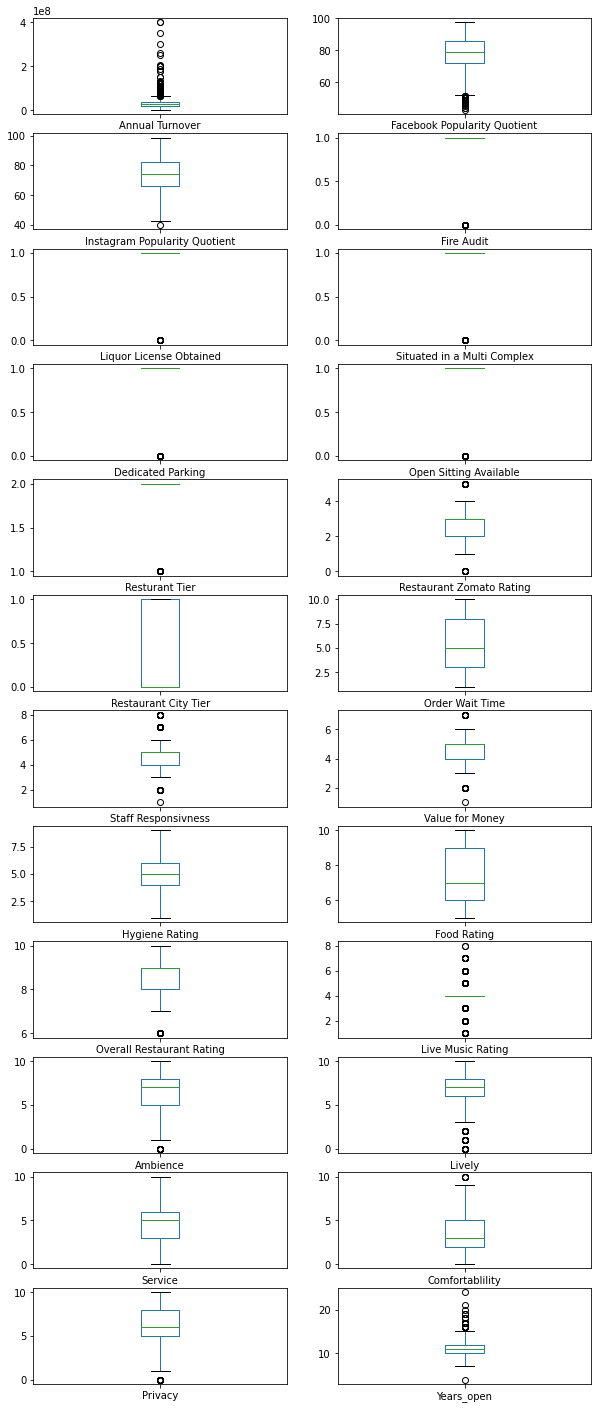

In [1126]:
df.plot(kind='box', subplots=True,figsize=(10, 40),layout=(19,2),  sharex=False, sharey=False)
plt.show()

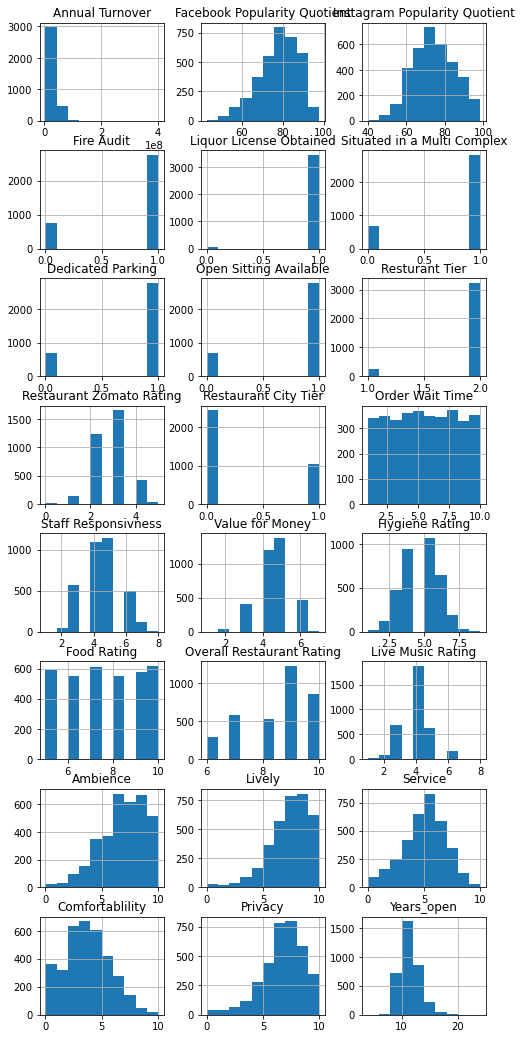

In [1127]:
num_df = df.select_dtypes(include=np.number)
num_df.hist(layout = (13,3), figsize=(8, 30))
plt.show()

## Catboost regressor

In [1183]:
import numpy as np
from catboost import CatBoostRegressor, FeaturesData, Pool
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [1129]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 3493
Total number of columns in dataset = 29


In [1130]:
target_col = "Annual Turnover"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [1131]:
# Training and Validation Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [1132]:
# Function to determine if column in dataframe is string.
def is_str(col):
    for i in col:
        if pd.isnull(i):
            continue
        elif isinstance(i, str):
            return True
        else:
            return False

In [1133]:
# Splits the mixed dataframe into categorical and numerical features.
def split_features(df):
    cfc = []
    nfc = []
    for column in df:
        if is_str(df[column]):
            cfc.append(column)
        else:
            nfc.append(column)
    return df[cfc], df[nfc]

In [1134]:
# Replace all the nan categorical features with the same string "None".
# Replace all the nan numerical features with numpy nanmean.

def preprocess(cat_features, num_features):
    cat_features = cat_features.fillna("None")
    for column in num_features:
        num_features[column].fillna(np.nanmean(num_features[column]), inplace=True)
    return cat_features, num_features

In [1135]:
# Apply the "split_features" function on the data.
cat_tmp_train, num_tmp_train = split_features(X_train)
cat_tmp_test, num_tmp_test = split_features(X_test)

In [1136]:
# Now to apply the "preprocess" function.
# Getting a "SettingWithCopyWarning" but I usually ignore it.
cat_features_train, num_features_train = preprocess(cat_tmp_train, num_tmp_train)
cat_features_test, num_features_test = preprocess(cat_tmp_test, num_tmp_test)

In [1137]:
train_pool = Pool(
    data = FeaturesData(num_feature_data = np.array(num_features_train.values, dtype=np.float32), 
                    cat_feature_data = np.array(cat_features_train.values, dtype=object), 
                    num_feature_names = list(num_features_train.columns.values), 
                    cat_feature_names = list(cat_features_train.columns.values)),
    label =  np.array(y_train, dtype=np.float32)
)

In [1138]:
test_pool = Pool(
    data = FeaturesData(num_feature_data = np.array(num_features_test.values, dtype=np.float32), 
                    cat_feature_data = np.array(cat_features_test.values, dtype=object), 
                    num_feature_names = list(num_features_test.columns.values), 
                    cat_feature_names = list(cat_features_test.columns.values))
)

# Train & Predict

In [ ]:
model = CatBoostRegressor(loss_function='RMSE',
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)

In [ ]:
grid = {'iterations': np.arange(40000, 100000, 20000),
        'learning_rate': np.arange(0.05, 0.5, 0.1),
        'depth': [2,3,5,8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

In [ ]:
model.grid_search(grid, train_pool)

In [1147]:
preds = model.predict(test_pool)
rmse = (np.sqrt(mean_squared_error(y_test, preds)))
r2 = r2_score(y_test, preds)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 21205937.17
R2: -0.29


In [1148]:
model.score(train_pool)

0.9425166623988795

In [1150]:
#Mean Square Error
MSE = np.sqrt(mean_squared_error(y_test, preds))
MSE

21205937.1681422

# Test

In [1151]:
df = pd.read_csv('Test_dataset.csv',index_col=0)
df.head()

,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
Registration Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,1,1,0,2,Bar,Greek,3,0,10,5,3,5,8,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,1,1,1,2,Bar,Nature,4,0,10,4,5,6,8,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,1,0,1,2,Bar,Greek,2,0,6,5,5,6,9,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,1,1,1,2,Gastro Bar,90's,3,0,10,5,5,5,9,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,1,0,0,1,Bar,Mise En,4,1,7,5,5,7,8,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [1152]:
#Converting the count of missing values to the percentage of missing values present in each Variable and thus sorting it in decending format
percent = df.isnull().sum()*100/len(df)
percent.sort_values(ascending = False)

Live Sports Rating               94.2
Value Deals Rating               77.0
Comedy Gigs Rating               74.0
Live Music Rating                20.4
Overall Restaurant Rating         6.8
Endoresed By                      0.0
Dedicated Parking                 0.0
Situated in a Multi Complex       0.0
Liquor License Obtained           0.0
Fire Audit                        0.0
Instagram Popularity Quotient     0.0
Privacy                           0.0
Facebook Popularity Quotient      0.0
Resturant Tier                    0.0
Opening Day of Restaurant         0.0
Restaurant Location               0.0
City                              0.0
Open Sitting Available            0.0
Restaurant Zomato Rating          0.0
Restaurant Type                   0.0
Restaurant Theme                  0.0
Comfortablility                   0.0
Restaurant City Tier              0.0
Order Wait Time                   0.0
Staff Responsivness               0.0
Value for Money                   0.0
Hygiene Rati

In [1153]:
df = df.drop(columns = ['Live Sports Rating', 'Value Deals Rating', 'Comedy Gigs Rating', 'City'])
df.head()

,Cuisine,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
Registration Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20001,"tibetan,italian",Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,1,1,0,2,Bar,Greek,3,0,10,5,3,5,8,6.0,NaN,5,2,2,6,0
20002,"tibetan,italian",Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,1,1,1,2,Bar,Nature,4,0,10,4,5,6,8,9.0,3.0,7,8,5,1,8
20003,"algerian,belgian",Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,1,0,1,2,Bar,Greek,2,0,6,5,5,6,9,6.0,3.0,9,7,5,1,5
20004,"tibetan,greek",Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,1,1,1,2,Gastro Bar,90's,3,0,10,5,5,5,9,9.0,6.0,6,7,6,4,7
20005,"cuban,british",Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,1,0,0,1,Bar,Mise En,4,1,7,5,5,7,8,NaN,NaN,4,4,7,7,3


In [1154]:
#Assigning all the column to a single variable
missing = ['Live Music Rating','Overall Restaurant Rating','Facebook Popularity Quotient','Instagram Popularity Quotient','Resturant Tier','Ambience']

In [1155]:
#Treating missing values with the help of SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df[missing])
df[missing] = imputer.transform(df[missing])

In [1156]:
#checking the treatment is successfull or not
df.isnull().sum()

Cuisine                          0
Restaurant Location              0
Opening Day of Restaurant        0
Facebook Popularity Quotient     0
Endoresed By                     0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Resturant Tier                   0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsivness              0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Live Music Rating                0
Ambience                         0
Lively                           0
Service                          0
Comfortablility                  0
Privacy                          0
dtype: int64

In [1157]:
df.shape

(500, 28)

In [1158]:
#Checking the counts
df['Opening Day of Restaurant'].value_counts()

31-03-2011    3
10-03-2010    3
05-08-2011    3
19-07-2008    3
06-01-2010    3
09-07-2010    3
17-07-2008    3
24-07-2011    3
15-08-2010    2
30-11-2007    2
05-09-2011    2
23-05-2008    2
03-12-2010    2
27-06-2009    2
10-01-2010    2
21-07-2011    2
22-11-2008    2
02-05-2011    2
17-06-2010    2
23-08-2011    2
18-11-2010    2
10-03-2012    2
12-12-2010    2
06-10-2009    2
12-01-2011    2
30-07-2011    2
28-11-2011    2
17-01-2008    2
17-12-2009    2
28-05-2007    2
10-08-2009    2
15-05-2009    2
27-12-2010    2
04-11-2010    2
30-11-2010    2
30-06-2010    2
11-11-2008    2
28-03-2011    2
29-06-2010    2
13-02-2011    2
28-06-2010    2
31-08-2010    2
09-01-2010    2
29-05-2010    2
21-02-2010    2
10-05-2010    2
31-05-2010    2
11-03-2008    2
09-11-2008    2
22-02-2009    2
11-01-2009    2
31-08-2011    2
01-06-2011    2
25-09-2009    2
01-07-2011    2
16-02-2008    1
15-04-2007    1
27-06-2011    1
26-05-2007    1
05-11-2012    1
19-06-2010    1
29-08-2009    1
13-04-20

In [1159]:
#Calculating the age of restaurant
import pandas as pd
from datetime import datetime
from datetime import date


def calculate_age(Opening_day):
    Opening_day = datetime.strptime(Opening_day, "%d-%m-%Y").date()
    today = date.today()
    return today.year - Opening_day.year - ((today.month, today.day) < (Opening_day.month, Opening_day.day))

#Creating a new feature as 'Years_open'

df['Years_open'] = df['Opening Day of Restaurant'].apply(calculate_age)
print(df['Years_open'])

Registration Number
20001    10
20002     9
20003    10
20004    16
20005    12
20006    11
20007    12
20008    17
20009    10
20010    10
20011    10
20012     9
20013    12
20014    10
20015     7
20016    13
20017    12
20018     9
20019    11
20020    10
20021     9
20022    10
20023    12
20024     9
20025    12
20026    11
20027    10
20028    10
20029    11
20030     9
20031    13
20032    11
20033    10
20034    13
20035    10
20036    12
20037    11
20038    11
20039    11
20040    12
20041     9
20042    10
20043    10
20044    13
20045    13
20046    10
20047    11
20048    11
20049    11
20050    11
20051    11
20052    12
20053    13
20054     9
20055    11
20056    13
20057     9
20058     9
20059    11
20060    11
20061    16
20062    10
20063     9
20064    13
20065    11
20066     8
20067    11
20068    11
20069    10
20070    13
20071     9
20072    16
20073     9
20074    10
20075    10
20076     8
20077    10
20078    12
20079    12
20080    13
20081    10
20082   

In [1160]:
#checking unique values
df['Years_open'].unique()

array([10,  9, 16, 12, 11, 17,  7, 13,  8, 14, 15,  6], dtype=int64)

In [1161]:
#checking the shape of data
df.shape

(500, 29)

In [1162]:
#Dropping the 'Opening Day of Restaurant' column as it has no use
df = df.drop('Opening Day of Restaurant',axis='columns')

In [1163]:
#Checking the shape again
df.shape

(500, 28)

In [1164]:
#Grouping all the themes under 5% in 'other' section
z =df['Restaurant Theme'].value_counts()/len(df)*100
y = z[z.apply(lambda x:x<5)]
df['Restaurant Theme'] = df['Restaurant Theme'].apply(lambda x :'other' if x in y else x)
df['Restaurant Theme']

Registration Number
20001      Greek
20002      other
20003      Greek
20004       90's
20005      other
20006       90's
20007    Arabian
20008    Arabian
20009      Greek
20010    Arabian
20011      other
20012      Greek
20013      Greek
20014      other
20015      Greek
20016    Arabian
20017    Arabian
20018    Arabian
20019    Arabian
20020    Arabian
20021      Greek
20022    Arabian
20023    Arabian
20024      Greek
20025    Arabian
20026    Arabian
20027      other
20028    Arabian
20029      Greek
20030       90's
20031      Greek
20032    Arabian
20033      Greek
20034       90's
20035       90's
20036    Arabian
20037    Arabian
20038       90's
20039      Greek
20040    Arabian
20041      Greek
20042       90's
20043      Greek
20044    Arabian
20045       90's
20046    Arabian
20047      Greek
20048      Greek
20049      other
20050    Arabian
20051      Greek
20052      other
20053      Greek
20054      Greek
20055       90's
20056       90's
20057      Greek
20058      

In [1165]:
#Checking the value count
df['Restaurant Theme'].value_counts()

Arabian    219
Greek      133
90's        75
other       73
Name: Restaurant Theme, dtype: int64

In [1166]:
#Checking the uniqueness of the data
df['Restaurant Theme'].unique()

array(['Greek', 'other', "90's", 'Arabian'], dtype=object)

In [1167]:
df.shape

(500, 28)

In [1168]:
df

,Cuisine,Restaurant Location,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy,Years_open
Registration Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20001,"tibetan,italian",Near Business Hub,78.00,Tier A Celebrity,69.00,1,1,1,1,0,2.0,Bar,Greek,3,0,10,5,3,5,8,6.0,4.0,5.0,2,2,6,0,10
20002,"tibetan,italian",Near Party Hub,89.17,Not Specific,96.00,1,1,1,1,1,2.0,Bar,other,4,0,10,4,5,6,8,9.0,3.0,7.0,8,5,1,8,9
20003,"algerian,belgian",Near Party Hub,84.00,Not Specific,86.00,1,1,1,0,1,2.0,Bar,Greek,2,0,6,5,5,6,9,6.0,3.0,9.0,7,5,1,5,10
20004,"tibetan,greek",Near Party Hub,79.38,Not Specific,74.40,0,1,1,1,1,2.0,Gastro Bar,90's,3,0,10,5,5,5,9,9.0,6.0,6.0,7,6,4,7,16
20005,"cuban,british",Near Party Hub,84.67,Not Specific,86.46,1,1,1,0,0,1.0,Bar,other,4,1,7,5,5,7,8,9.0,4.0,4.0,4,7,7,3,12
20006,"japanese,thai",Near Party Hub,66.85,Not Specific,59.11,1,1,0,1,0,2.0,Bar,90's,4,1,1,5,6,6,8,10.0,4.0,7.0,6,3,4,5,11
20007,"welsh,thai",Near Business Hub,77.20,Tier A Celebrity,53.40,1,1,1,0,0,2.0,Bar,Arabian,3,0,5,5,6,6,10,10.0,4.0,8.0,7,5,5,9,12
20008,"british,japanese",Near Party Hub,62.00,Not Specific,64.00,1,1,1,1,1,2.0,Caffee,Arabian,3,1,2,4,4,4,9,10.0,4.0,10.0,8,7,4,5,17
20009,"tibetan,greek",Near Party Hub,82.60,Tier A Celebrity,76.00,1,1,1,1,1,2.0,Bar,Greek,3,1,6,5,5,4,8,9.0,3.0,4.0,5,6,8,4,10


In [1169]:
df = df.rename({'Endoresed By' : 'Endorsed By'}, axis=1)

In [1170]:
# Function to determine if column in dataframe is string.
def is_str(col):
    for i in col:
        if pd.isnull(i):
            continue
        elif isinstance(i, str):
            return True
        else:
            return False

In [1171]:
# Splits the mixed dataframe into categorical and numerical features.
def split_features(df):
    cfc = []
    nfc = []
    for column in df:
        if is_str(df[column]):
            cfc.append(column)
        else:
            nfc.append(column)
    return df[cfc], df[nfc]

In [1172]:
# Replace all the nan categorical features with the same string "None".
# Replace all the nan numerical features with numpy nanmean.

def preprocess(cat_features, num_features):
    cat_features = cat_features.fillna("None")
    for column in num_features:
        num_features[column].fillna(np.nanmean(num_features[column]), inplace=True)
    return cat_features, num_features

In [1173]:
cat_tmp_test, num_tmp_test = split_features(df)

In [1174]:
cat_features_test, num_features_test = preprocess(cat_tmp_test, num_tmp_test)

In [1175]:
test_pool = Pool(
    data = FeaturesData(num_feature_data = np.array(num_features_test.values, dtype=np.float32), 
                    cat_feature_data = np.array(cat_features_test.values, dtype=object), 
                    num_feature_names = list(num_features_test.columns.values), 
                    cat_feature_names = list(cat_features_test.columns.values))
)

In [1176]:
test = pd.DataFrame(model.predict(test_pool)).apply(lambda x: '%.5f' % x, axis=1)

In [1177]:
test = pd.DataFrame(test)
test = test.rename(columns = {0: 'Annual Turnover'}, inplace = False)
test

,Annual Turnover
0,26436230.68045
1,45956944.44172
2,17129165.56834
3,25474127.22060
4,35246755.84723
5,31374302.89654
6,15297069.17107
7,29475049.46804
8,30778011.42901
9,6970662.61632


In [1178]:
sample = pd.read_csv('Sample_Solution.csv')
sample = sample.drop('Annual Turnover',axis='columns')
sample

,Registration Number
0,20001
1,20002
2,20003
3,20004
4,20005
5,20006
6,20007
7,20008
8,20009
9,20010


In [1179]:
final = pd.concat([sample,test], axis=1)
final = final.dropna()

In [1180]:
final

,Registration Number,Annual Turnover
0,20001,26436230.68045
1,20002,45956944.44172
2,20003,17129165.56834
3,20004,25474127.22060
4,20005,35246755.84723
5,20006,31374302.89654
6,20007,15297069.17107
7,20008,29475049.46804
8,20009,30778011.42901
9,20010,6970662.61632


In [1181]:
final.to_csv(r'C:\Users\sahil\OneDrive\python labs\Hackathon\Submission_Data_with_catboost.csv', index = False)